**Recurrent Neural Network(RNN)**


https://sebastianraschka.com/blog/2020/intro-to-dl-ch01.html

https://medium.datadriveninvestor.com/a-high-level-introduction-to-lstms-34f81bfa262d

https://towardsdatascience.com/machine-learning-for-beginners-an-introduction-to-neural-networks-d49f22d238f9

## **Load packages**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

Here, we try to import liabraries from tensorflow.

## **Load Dataset**
movie reviews

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

Here, try to download the dataset and load it here and devide the dataset into part in train and test. and try to load data using the load_data() with parameter number of words id 5000.

---



In [ ]:
x_train.shape

(25000,)

In [ ]:
padded_inputs = pad_sequences(x_train, maxlen=300, value = 0.0)
padded_inputs_test = pad_sequences(x_test, maxlen=300, value = 0.0)

here, we try to pad the sequences of the x_train and set the maximum length 300 and value is 0.0 and for x_test pad sequence for x_test set the maximum length to 300 and value is 0.0.

In [ ]:
padded_inputs.shape

(25000, 300)

## **Build model**

In [ ]:
model = Sequential()
model.add(Embedding(5000, 15, input_length=300))
model.add(LSTM(10))
model.add(Dense(1, activation='sigmoid'))

The model needs to know what input shape it should expect. For this reason, the first layer in a Sequential model needs to receive information about its input shape. here first we sequential the model and in the model add embedding dence to 5000 and input dim is 15 and input length is 300. now we add the lstm set is 10.and finallly activate the sigmoid.

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 300, 15)           75000     
                                                                 
 lstm_3 (LSTM)               (None, 10)                1040      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 76,051
Trainable params: 76,051
Non-trainable params: 0
_________________________________________________________________


Here is the model summary for lstm and dense. where total parameters are 76,051 and trainabl parameter are 76,051 and Non-trainable is 0.

## **Train model**

In [ ]:
model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

here we compile the  model using the Adam optimizer and  set the loss as BinaryCrossentropy() and use the accuracy metric.

In [ ]:
history = model.fit(padded_inputs, y_train, batch_size=128, epochs=18, verbose=1, validation_split=0.2)

Epoch 1/18
157/157 [==============================] - 19s 124ms/step - loss: 0.0385 - accuracy: 0.9905 - val_loss: 0.5838 - val_accuracy: 0.8534
Epoch 2/18
157/157 [==============================] - 19s 124ms/step - loss: 0.0344 - accuracy: 0.9922 - val_loss: 0.6344 - val_accuracy: 0.8530
Epoch 3/18
157/157 [==============================] - 19s 124ms/step - loss: 0.0311 - accuracy: 0.9929 - val_loss: 0.6613 - val_accuracy: 0.8532
Epoch 4/18
157/157 [==============================] - 19s 123ms/step - loss: 0.0276 - accuracy: 0.9939 - val_loss: 0.6770 - val_accuracy: 0.8526
Epoch 5/18
157/157 [==============================] - 20s 125ms/step - loss: 0.0241 - accuracy: 0.9948 - val_loss: 0.7077 - val_accuracy: 0.8542
Epoch 6/18
157/157 [==============================] - 20s 125ms/step - loss: 0.0219 - accuracy: 0.9949 - val_loss: 0.7263 - val_accuracy: 0.8528
Epoch 7/18
157/157 [==============================] - 20s 130ms/step - loss: 0.0207 - accuracy: 0.9954 - val_loss: 0.7379 - val_ac

Here, we try to change the epoche from 10 to 15 and check that model is fit or not.

## **Evaluate model**

### **print accuarcy and loss on test dataset**

In [ ]:
test_loss, test_acc = model.evaluate(padded_inputs_test, y_test, verbose=False)
print("accuarcy of test dataset:"+str(test_acc))
print("loss of test dataset:"+str(test_loss))

accuarcy of test dataset:0.8452399969100952
loss of test dataset:0.8954957723617554


### **plot accuracy of each epoch on train and test dataset**

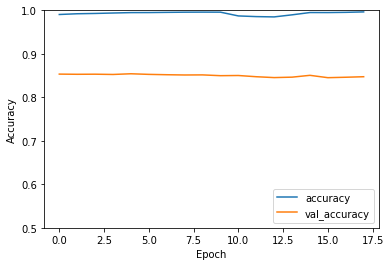

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

### **plot loss of each epoch on train and test dataset**

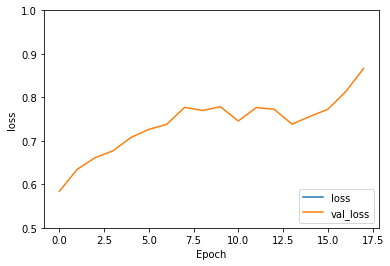

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')